# Sentiment Analysis by Venues

## Import the needed libraries

In [5]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

Fetching package metadata .............
Solving package specifications: .

Package plan for installation in environment /opt/conda/envs/DSX-Python35:

The following NEW packages will be INSTALLED:

    geographiclib: 1.49-py_0   conda-forge
    geopy:         1.19.0-py_0 conda-forge

geographiclib- 100% |################################| Time: 0:00:00  21.93 MB/s
geopy-1.19.0-p 100% |################################| Time: 0:00:00  34.75 MB/s
Fetching package metadata .............
Solving package specifications: .

Package plan for installation in environment /opt/conda/envs/DSX-Python35:

The following NEW packages will be INSTALLED:

    altair:  2.2.2-py35_1 conda-forge
    branca:  0.3.1-py_0   conda-forge
    folium:  0.5.0-py_0   conda-forge
    vincent: 0.4.4-py_1   conda-forge

altair-2.2.2-p 100% |################################| Time: 0:00:00  49.53 MB/s
branca-0.3.1-p 100% |################################| Time: 0:00:00  34.26 MB/s
vincent-0.4.4- 100% |###################

In [6]:
CLIENT_ID = '' # your Foursquare ID
CLIENT_SECRET = '' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: RUQC5VZVE55JE1J10WDKDECQ3KVUXW55J3RTJC4UJPVWY4WC
CLIENT_SECRET:ZKUNUMRVA45ZQ1DTZ3ERKA3UIRYPRVPEDIRHAE5QBRANKWDJ


In [7]:
address = '102 North End Ave, New York, NY'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

40.7149555 -74.0153365


In [8]:
search_query = 'Italian'
radius = 500
print(search_query + ' .... OK!')

Italian .... OK!


In [9]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=RUQC5VZVE55JE1J10WDKDECQ3KVUXW55J3RTJC4UJPVWY4WC&client_secret=ZKUNUMRVA45ZQ1DTZ3ERKA3UIRYPRVPEDIRHAE5QBRANKWDJ&ll=40.7149555,-74.0153365&v=20180604&query=Italian&radius=500&limit=30'

In [11]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5cab1f07dd57977ce676b12d'},
 'response': {'venues': [{'categories': [{'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/pizza_',
       'suffix': '.png'},
      'id': '4bf58dd8d48988d1ca941735',
      'name': 'Pizza Place',
      'pluralName': 'Pizza Places',
      'primary': True,
      'shortName': 'Pizza'}],
    'delivery': {'id': '294544',
     'provider': {'icon': {'name': '/delivery_provider_seamless_20180129.png',
       'prefix': 'https://fastly.4sqi.net/img/general/cap/',
       'sizes': [40, 50]},
      'name': 'seamless'},
     'url': 'https://www.seamless.com/menu/harrys-italian-pizza-bar-225-murray-st-new-york/294544?affiliate=1131&utm_source=foursquare-affiliate-network&utm_medium=affiliate&utm_campaign=1131&utm_content=294544'},
    'hasPerk': False,
    'id': '4fa862b3e4b0ebff2f749f06',
    'location': {'address': '225 Murray St',
     'cc': 'US',
     'city': 'New York',
     'country': 'United States',
     'distance'

In [12]:
# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.head()

,categories,delivery.id,delivery.provider.icon.name,delivery.provider.icon.prefix,delivery.provider.icon.sizes,delivery.provider.name,delivery.url,hasPerk,id,location.address,...,location.crossStreet,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.postalCode,location.state,name,referralId
0,"[{'name': 'Pizza Place', 'shortName': 'Pizza',...",294544,/delivery_provider_seamless_20180129.png,https://fastly.4sqi.net/img/general/cap/,"[40, 50]",seamless,https://www.seamless.com/menu/harrys-italian-p...,False,4fa862b3e4b0ebff2f749f06,225 Murray St,...,NaN,58,"[225 Murray St, New York, NY 10282, United Sta...","[{'label': 'display', 'lng': -74.0147394020935...",40.715218,-74.014739,10282,NY,Harry's Italian Pizza Bar,v-1554718471
1,"[{'name': 'Food', 'shortName': 'Food', 'plural...",NaN,NaN,NaN,NaN,NaN,NaN,False,4f3232e219836c91c7bfde94,63 W Broadway,...,NaN,446,"[63 W Broadway, New York, NY 10007, United Sta...","[{'label': 'display', 'lng': -74.010086, 'lat'...",40.714460,-74.010086,10007,NY,Conca Cucina Italian Restaurant,v-1554718471
2,"[{'name': 'Italian Restaurant', 'shortName': '...",NaN,NaN,NaN,NaN,NaN,NaN,False,3fd66200f964a520f4e41ee3,124 Chambers St,...,btwn Church St & W Broadway,549,[124 Chambers St (btwn Church St & W Broadway)...,"[{'label': 'display', 'lng': -74.0088476621782...",40.715337,-74.008848,10007,NY,Ecco,v-1554718471


In [13]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,postalCode,state,id
0,Harry's Italian Pizza Bar,Pizza Place,225 Murray St,US,New York,United States,NaN,58,"[225 Murray St, New York, NY 10282, United Sta...","[{'label': 'display', 'lng': -74.0147394020935...",40.715218,-74.014739,10282,NY,4fa862b3e4b0ebff2f749f06
1,Conca Cucina Italian Restaurant,Food,63 W Broadway,US,New York,United States,NaN,446,"[63 W Broadway, New York, NY 10007, United Sta...","[{'label': 'display', 'lng': -74.010086, 'lat'...",40.714460,-74.010086,10007,NY,4f3232e219836c91c7bfde94
2,Ecco,Italian Restaurant,124 Chambers St,US,New York,United States,btwn Church St & W Broadway,549,[124 Chambers St (btwn Church St & W Broadway)...,"[{'label': 'display', 'lng': -74.0088476621782...",40.715337,-74.008848,10007,NY,3fd66200f964a520f4e41ee3


In [14]:
dataframe_filtered.name

0          Harry's Italian Pizza Bar
1    Conca Cucina Italian Restaurant
2                               Ecco
Name: name, dtype: object

In [15]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=13) # generate map centred around the Conrad Hotel

# add a red circle marker to represent the Conrad Hotel
folium.features.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='Conrad Hotel',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map)

# add the Italian restaurants as blue circle markers
for lat, lng, label in zip(dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)

# display map
venues_map

# Get tips count, ratings and sentiments of nearby restaurents one by one

## Get tips count, rating and sentiment of the 1st nearby restaurent

In [16]:
!conda install -c conda-forge textblob --yes
import textblob
from textblob import TextBlob
venue_id = '4fa862b3e4b0ebff2f749f06' # ID of Harry's Italian Pizza Bar
url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)
url
result = requests.get(url).json()
print(result['response']['venue'].keys())
result['response']['venue']
try:
    rating0=result['response']['venue']['rating']
    print(result['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.')
count0=result['response']['venue']['tips']['count']
count0
## Harry's Italian Pizza Bar Tips
limit = 15 # set limit to be greater than or equal to the total number of tips
url = 'https://api.foursquare.com/v2/venues/{}/tips?client_id={}&client_secret={}&v={}&limit={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION, limit)

results = requests.get(url).json()
results
tips = results['response']['tips']['items']

tip = results['response']['tips']['items'][0]
tip.keys()

pd.set_option('display.max_colwidth', -1)

tips_df = json_normalize(tips) # json normalize tips

# columns to keep
filtered_columns = ['text', 'agreeCount', 'disagreeCount', 'id', 'user.firstName', 'user.lastName', 'user.gender', 'user.id']
tips_filtered = tips_df.loc[:, filtered_columns]

# display tips
tips_filtered
blob=TextBlob(tips_filtered['text'][0])
sentiment00=blob.sentiment.polarity
print(blob.sentiment.polarity)
blob=TextBlob(tips_filtered['text'][1])
sentiment01=blob.sentiment.polarity
print(blob.sentiment.polarity)

Fetching package metadata .............
Solving package specifications: .

Package plan for installation in environment /opt/conda/envs/DSX-Python35:

The following NEW packages will be INSTALLED:

    textblob: 0.15.3-py_0 conda-forge

textblob-0.15. 100% |################################| Time: 0:00:00  57.84 MB/s
dict_keys(['canonicalUrl', 'name', 'location', 'allowMenuUrlEdit', 'menu', 'likes', 'timeZone', 'shortUrl', 'hours', 'id', 'attributes', 'delivery', 'stats', 'contact', 'listed', 'hereNow', 'colors', 'pageUpdates', 'price', 'inbox', 'url', 'beenHere', 'ratingSignals', 'popular', 'bestPhoto', 'reasons', 'ok', 'dislike', 'verified', 'ratingColor', 'tips', 'createdAt', 'categories', 'hasMenu', 'specials', 'photos', 'rating'])
7.1
0.44375
0.30000000000000004


## Get tips count, rating and sentiment of the 2nd nearby restaurent

Third nearby restaurent has not been rated yet so set to contants for a better visualization.

In [17]:
venue_id = '3fd66200f964a520f4e41ee3' # ID of Harry's Italian Pizza Bar
url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)
url
result = requests.get(url).json()
print(result['response']['venue'].keys())
result['response']['venue']
try:
    rating1=result['response']['venue']['rating']
    print(result['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.')
count1=result['response']['venue']['tips']['count']
count1
## Harry's Italian Pizza Bar Tips
limit = 15 # set limit to be greater than or equal to the total number of tips
url = 'https://api.foursquare.com/v2/venues/{}/tips?client_id={}&client_secret={}&v={}&limit={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION, limit)

results = requests.get(url).json()
results

tips = results['response']['tips']['items']

tip = results['response']['tips']['items'][0]
tip.keys()

pd.set_option('display.max_colwidth', -1)

tips_df = json_normalize(tips) # json normalize tips

# columns to keep
filtered_columns = ['text', 'agreeCount', 'disagreeCount', 'id', 'user.firstName', 'user.lastName', 'user.gender', 'user.id']
tips_filtered = tips_df.loc[:, filtered_columns]

# display tips
tips_filtered
blob=TextBlob(tips_filtered['text'][0])
sentiment10=blob.sentiment.polarity
print(blob.sentiment.polarity)
blob=TextBlob(tips_filtered['text'][1])
sentiment11=blob.sentiment.polarity
print(blob.sentiment.polarity)
count2=0.1
rating2=0.1
sentiment20=0.1
sentiment21=0.1

dict_keys(['canonicalUrl', 'name', 'location', 'allowMenuUrlEdit', 'menu', 'likes', 'timeZone', 'shortUrl', 'hours', 'id', 'attributes', 'dislike', 'stats', 'contact', 'listed', 'hereNow', 'colors', 'pageUpdates', 'price', 'inbox', 'url', 'beenHere', 'ratingSignals', 'popular', 'bestPhoto', 'reasons', 'ok', 'verified', 'ratingColor', 'tips', 'createdAt', 'categories', 'hasMenu', 'specials', 'photos', 'rating'])
7.8
0.2333333333333333
0.596875


## Get the plot of tips count.

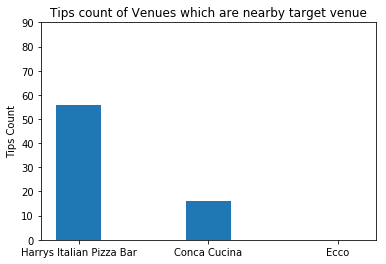

In [20]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt


N = 3
menMeans = (count0, count1, count2)
#womenMeans = (25, 32, 34, 20, 25)
#menStd = (2, 3, 4, 1, 2)
#womenStd = (3, 5, 2, 3, 3)
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, menMeans, width)
#p2 = plt.bar(ind, womenMeans, width,
#             bottom=menMeans, yerr=womenStd)

plt.ylabel('Tips Count')
plt.title('Tips count of Venues which are nearby target venue')
plt.xticks(ind, ('Harrys Italian Pizza Bar', 'Conca Cucina','Ecco'))
plt.yticks(np.arange(0, 100, 10))
#plt.legend((p1[0]), ('Men'))

plt.show()

## Get the plot of ratings.

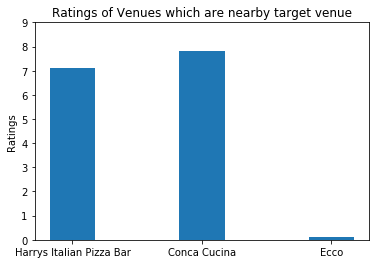

In [21]:
N = 3
menMeans = (rating0, rating1, rating2)
#womenMeans = (25, 32, 34, 20, 25)
#menStd = (2, 3, 4, 1, 2)
#womenStd = (3, 5, 2, 3, 3)
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, menMeans, width)
#p2 = plt.bar(ind, womenMeans, width,
#             bottom=menMeans, yerr=womenStd)

plt.ylabel('Ratings')
plt.title('Ratings of Venues which are nearby target venue')
plt.xticks(ind, ('Harrys Italian Pizza Bar', 'Conca Cucina','Ecco'))
plt.yticks(np.arange(0, 10, 1))
#plt.legend((p1[0]), ('Men'))

plt.show()

## Get the plot of sentiments.

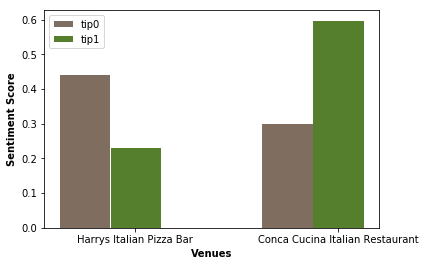

In [22]:
# set width of bar
barWidth = 0.25
 
# set height of bar
bars1 = [sentiment00, sentiment01]
bars2 = [sentiment10, sentiment11]
bars3 = [0.1, 0.1]
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
# Make the plot
plt.bar(r1, bars1, color='#7f6d5f', width=barWidth, edgecolor='white', label='tip0')
plt.bar(r2, bars2, color='#557f2d', width=barWidth, edgecolor='white', label='tip1')
#plt.bar(r3, bars3, color='#2d7f5e', width=barWidth, edgecolor='white', label='var3')
 
# Add xticks on the middle of the group bars
plt.xlabel('Venues', fontweight='bold')
plt.ylabel('Sentiment Score', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], ['Harrys Italian Pizza Bar', 'Conca Cucina Italian Restaurant'])
 
# Create legend & Show graphic
plt.legend()
plt.show()

# Conclusion

The conclusion is that the restaurent which is closest to the target location is having less postive sentiment score while other one are alittle far but one of them is having high rating and good postive sentiment score. It means we can get findings from that restuarent and open another in nearby location to the target.